## Import all Necessary Libraries

In [45]:
import pandas as pd
import numpy as np
import warnings
warnings. simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


## Let's read the data

In [46]:
dd = pd.read_csv("complaints.csv")

## CHeck Head and tail

In [47]:
dd.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544
1,2024-02-26,Debt collection,Other debt,Threatened to contact someone or share informa...,Talked to a third-party about your debt,NaN,NaN,"Marlette Funding, LLC",IL,60060,NaN,Consent not provided,Web,2024-02-26,Closed with explanation,Yes,NaN,8424268
2,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company believes it acted appropriately as aut...,"CCS Financial Services, Inc.",NC,27536,NaN,Consent not provided,Web,2024-02-26,Closed with non-monetary relief,Yes,NaN,8423775
3,2024-02-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,I am disappointed to have received a credit re...,NaN,LEXISNEXIS,CA,94124,NaN,Consent provided,Web,2024-02-20,Closed with explanation,Yes,NaN,8379830
4,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"The companies, along with the credit reporting...",NaN,"EQUIFAX, INC.",NC,28804,NaN,Consent provided,Web,2024-01-26,Closed with non-monetary relief,Yes,NaN,8232435


In [48]:
dd.tail(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
5167780,2023-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",GA,30013,NaN,Consent not provided,Web,2023-08-02,Closed with explanation,Yes,NaN,7341166
5167781,2023-08-04,"Payday loan, title loan, or personal loan",Payday loan,Charged fees or interest you didn't expect,NaN,NaN,NaN,Flandreau Santee Sioux Tribe,TX,75057,NaN,Consent not provided,Web,2023-08-18,Closed with explanation,Yes,NaN,7350142


## Lets check Shape

In [29]:
dd.shape

(5167782, 18)

## We do not handle null values since we could also lose some crucial data.

In [50]:
dd.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 2
Sub-issue                        735101
Consumer complaint narrative    3351574
Company public response         2693192
Company                               0
State                             45611
ZIP code                          30225
Tags                            4684932
Consumer consent provided?      1026812
Submitted via                         0
Date sent to company                  0
Company response to consumer         14
Timely response?                      0
Consumer disputed?              4399466
Complaint ID                          0
dtype: int64

In [53]:
dd.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

## Let's compelte the First question, here this dataset more talks about Customer complaint on financial products to the companies and to analylize more on the same here are few analysis made.
## The Detailed Explanation about each analysis are made in the  seperate PDF file.

<AxesSubplot: title={'center': 'Number of Complaints Over Time'}, xlabel='Date received'>

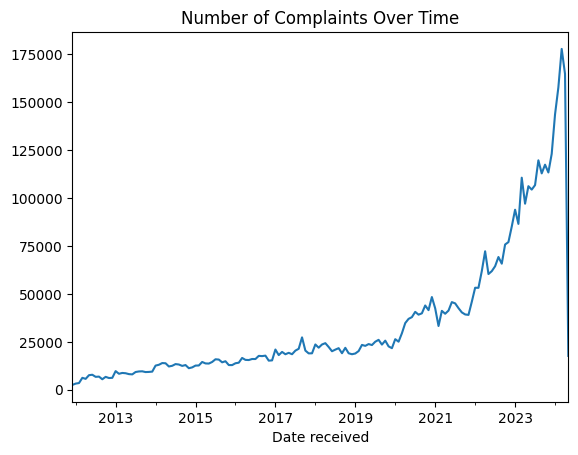

In [54]:
# Trend Analysis
dd['Date received'] = pd.to_datetime(dd['Date received'])
complaints_per_month = dd.resample('M', on='Date received').size()
# Plotting the trend
complaints_per_month.plot(title='Number of Complaints Over Time')

In [135]:
# Company wise issue and  their sub-issue on count basis
company_issues = dd.groupby('Company')['Issue','Sub-issue'].value_counts().reset_index()
pd.DataFrame(company_issues)

,Company,Issue,Sub-issue,0
0,"(Former)Shapiro, Swertfeger & Hasty, LLP",Disclosure verification of debt,Not given enough info to verify debt,2
1,"(Former)Shapiro, Swertfeger & Hasty, LLP",Improper use of your report,Credit inquiries on your report that you don't...,1
2,"(Former)Shapiro, Swertfeger & Hasty, LLP",Incorrect information on your report,Information belongs to someone else,1
3,"(Former)Shapiro, Swertfeger & Hasty, LLP",Incorrect information on your report,Account status incorrect,1
4,"(Former)Shapiro, Swertfeger & Hasty, LLP",Improper use of your report,Received unsolicited financial product or insu...,1
...,...,...,...,...
87847,"Lippman Recupero, LLC",Communication tactics,Threatened to take legal action,1
87848,"Lippman Recupero, LLC",Communication tactics,"You told them to stop contacting you, but they...",1
87849,"Lippman Recupero, LLC",Disclosure verification of debt,Not given enough info to verify debt,1
87850,"Lippman Recupero, LLC",Struggling to pay your loan,Loan balance remaining after the vehicle is re...,1


In [138]:
# Top 5 consumer complaint narratives
top_narratives = dd['Consumer complaint narrative'].value_counts().head(5)
pd.DataFrame(top_narratives)

,Consumer complaint narrative
"In accordance with the Fair Credit Reporting act. The List of accounts below has violated my federally protected consumer rights to privacy and confidentiality under 15 USC 1681.\n\n15 U.S.C 1681 section 602 A. States I have the right to privacy.\n\n15 U.S.C 1681 Section 604 A Section 2 : It also states a consumer reporting agency can not furnish a account without my written instructions 15 U.S.C 1681c. ( a ) ( 5 ) Section States : no consumer reporting agency may make any consumer report containing any of the following items of information Any other adverse item of information, other than records of convictions of crimes which antedates the report by more than seven years.\n\n15 U.S.C. 1681s-2 ( A ) ( 1 ) A person shall not furnish any information relating to a consumer to any consumer reporting agency if the person knows or has reasonable cause to believe that the information is inaccurate.",6975
I'm really not sure what happened. I have mailed off letters to the credit bureaus continuously and thus far I have not gotten a response. My name is XXXX XXXX XXXX and I am filing this complaint for falsely reporting misleading information. There is no third party involved. Please review the uploaded letters.,3244
I'm really not sure what happened. I have mailed off letters to the credit bureaus continuously and thus far I have not gotten a response. My name is XXXX XXXX and I am filing this complaint for falsely reporting misleading information. There is no third party involved. Please review the uploaded letters.,3159
My credit reports are inaccurate. These inaccuracies are causing creditors to deny me credit. You have the duty to report accurate information about consumers. Please investigate these accounts and inquires and update these accounts accordingly to avoid future litigation.,3104
"My name is XXXX XXXX this complaint is not made in error neither is it being made by a third party.I declare under penalty of perjury I am alleging that a person or company- without my authorization- from unauthorized use of my social security number and card used my personal identifying information to apply for goods, services, or money ; and, was successful in creating some accounts. I have no knowledge of this and All is being investigated by the FTC and Under 15 U.S. Code 1681b Permissible purposes of consumer reports i never gave any written consent to report anything on my consumer reports no consent is fraud.",2802


<AxesSubplot: title={'center': 'Company Responses to Consumer'}>

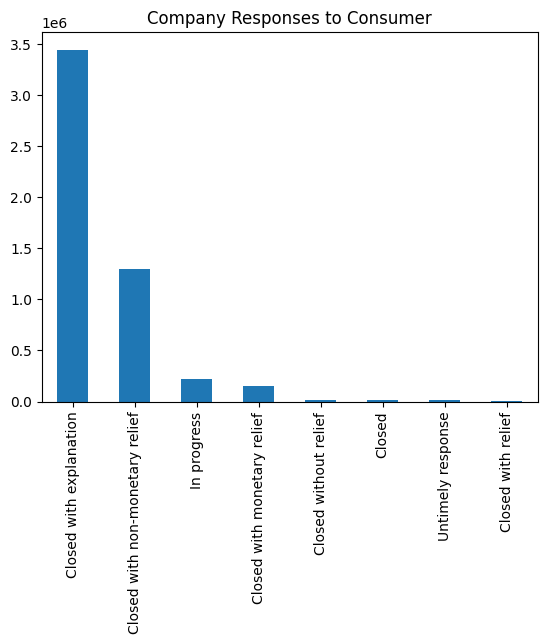

In [100]:
# Company Response Analysis
response_counts = dd['Company response to consumer'].value_counts()
# Plotting the distribution of company responses
response_counts.plot(kind='bar', title='Company Responses to Consumer')

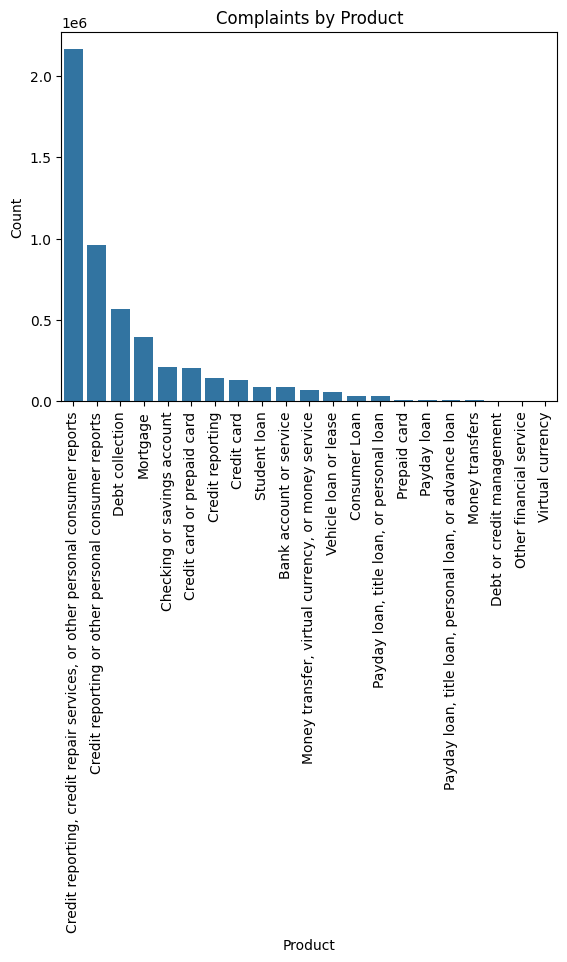

In [109]:
# Products with High amount of complaints
product_counts = dd["Product"].value_counts()

# Resetting index to make the MultiIndex columns accessible
product_counts = product_counts.reset_index(name='Count')

# Plotting the distribution of complaints by product
sns.barplot(x='index', y='Count', data=product_counts)
plt.title('Complaints by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

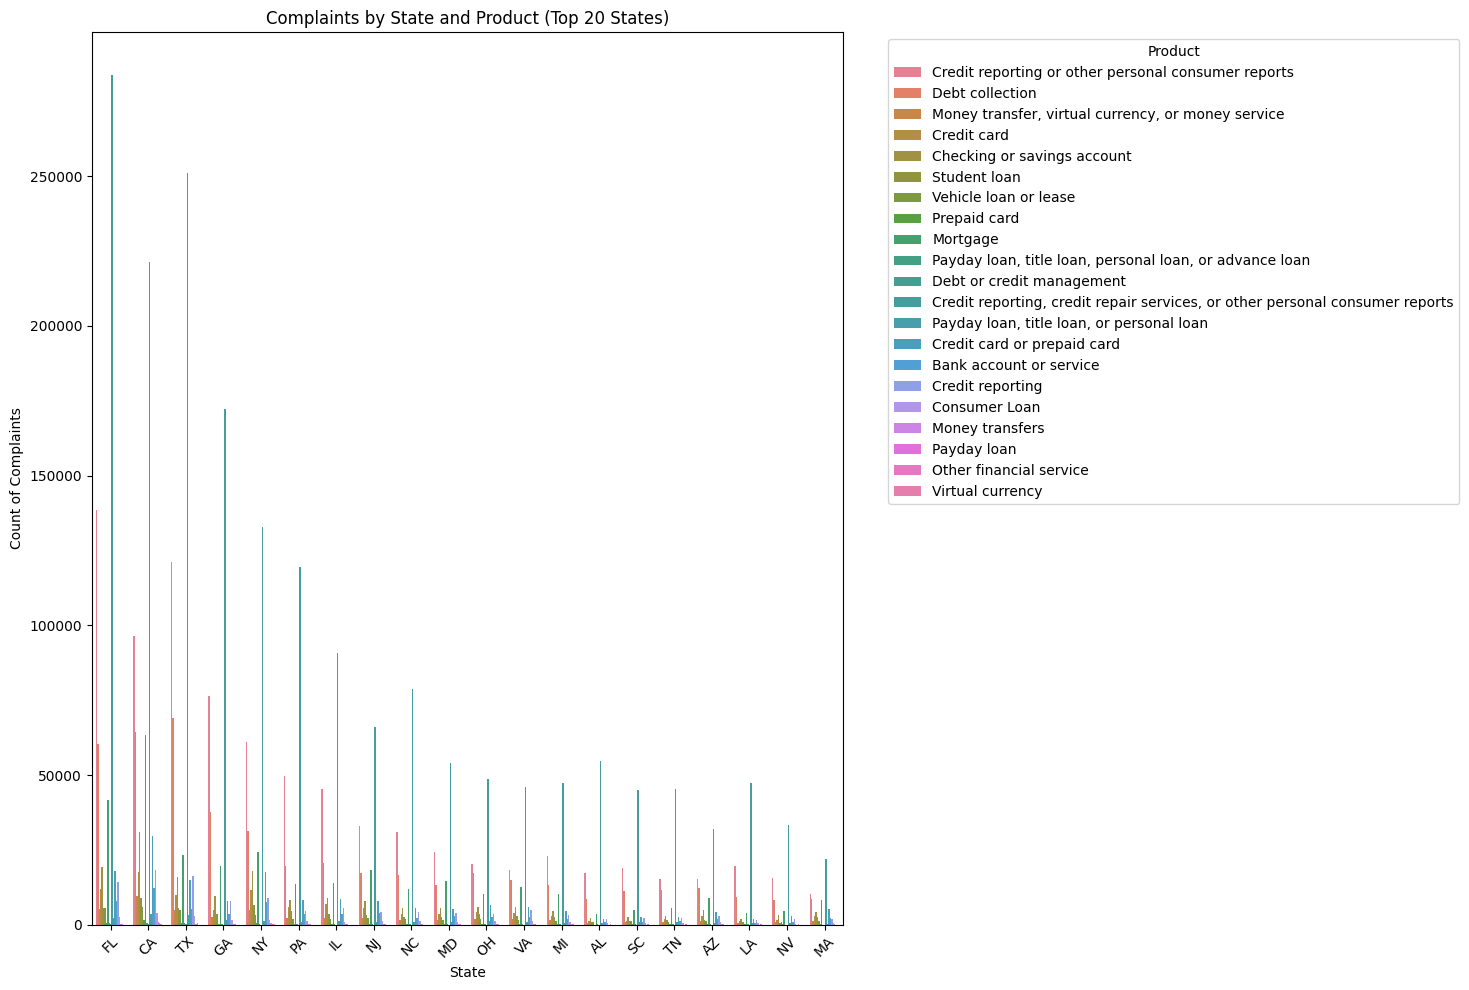

In [127]:
# State wise product complaint for products
state_counts = dd['State'].value_counts()
top_n = 20
top_states = state_counts.head(top_n).index

# Filter the data for the top N states
dd_top_states = dd[dd['State'].isin(top_states)]

# Plotting the faceted plot
plt.figure(figsize=(15, 10))
sns.countplot(data=dd_top_states, x='State', hue='Product', order=top_states)
plt.title(f'Complaints by State and Product (Top {top_n} States)')
plt.xlabel('State')
plt.ylabel('Count of Complaints')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

<AxesSubplot: title={'center': 'Timely Responses'}>

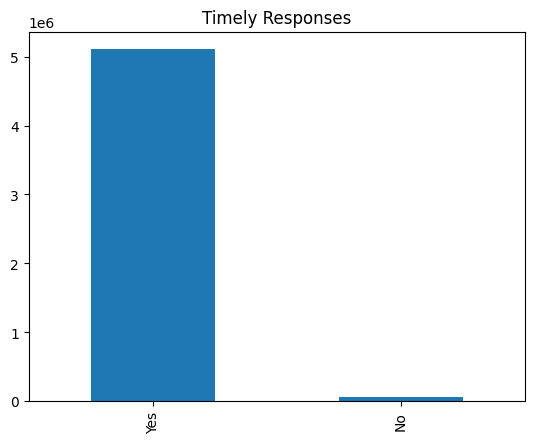

In [128]:
#Response Time Analysis
timely_response_counts = dd['Timely response?'].value_counts()
# Plotting the distribution of timely responses
timely_response_counts.plot(kind='bar', title='Timely Responses')

##  Question 2 : Given an unsorted array of integers, find the length of the longest continuous
## increasing subsequence (subarray). 
## Example 1:
## Input: [1,3,5,4,7]
## Output: 3

In [152]:
def m_len(nums):
    if not nums:
        return 0
    
    max_length = 1
    current_length = 1
    
    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1
    
    return max_length

# Example usage:
input_nums = [2,2,2,2,2]
output_length = m_len(input_nums)
print("Output:", output_length)

Output: 1


## 3. Given a list of non negative integers, arrange them such that they form the largest number.
 
 ## Example 1:
 ## Input: [10,2]
 ## Output: &quot;210&quot;

In [160]:
from functools import cmp_to_key

def largest_number(nums):
    
    # Convert the integers to strings
    nums = [str(num) for num in nums]
    
    # Define a custom sorting function
    def compare(a, b):
        # Compare the concatenation of a and b with the concatenation of b and a
        # If a + b is greater than b + a, return -1 (to sort in descending order)
        # Otherwise, return 1 (to sort in ascending order)
        return int(b + a) - int(a + b)
    
    # Sort the strings using the custom sorting function
    nums.sort(key=cmp_to_key(compare))
    
    # Join the sorted strings and return the result
    return ''.join(nums) if nums[0] != '0' else '0'


In [162]:
input_nums = [50,25]
output = largest_number(input_nums)
print("Output:", output)

Output: 5025


## 4. Store all the &quot;servlet-name&quot;, and &quot;servlet-class&quot; to a csv file from the attached sample_json.json file using Python.

In [164]:
import json
import csv

# Load the JSON data
with open('DT A1 sample_json.json', 'r') as file:
    data = json.load(file)

# Extract the "servlet-name" and "servlet-class" values
servlets = data['web-app']['servlet']
servlet_data = []
for servlet in servlets:
    servlet_name = servlet['servlet-name']
    servlet_class = servlet['servlet-class']
    servlet_data.append([servlet_name, servlet_class])

# Write the data to a CSV file
with open('servlet_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['servlet-name', 'servlet-class'])
    writer.writerows(servlet_data)

print("Servlet data saved to servlet_data.csv")

Servlet data saved to servlet_data.csv


In [165]:
pd.read_csv('servlet_data.csv')

,servlet-name,servlet-class
0,cofaxCDS,org.cofax.cds.CDSServlet
1,cofaxEmail,org.cofax.cds.EmailServlet
2,cofaxAdmin,org.cofax.cds.AdminServlet
3,fileServlet,org.cofax.cds.FileServlet
4,cofaxTools,org.cofax.cms.CofaxToolsServlet
